# Feature Selection - Autocorrelation - Pearson Correlation Coefficients Filter Method

A dataset can contain correlated features. Two or more than two features are correlated if they are close to each other in the linear space.

Goal is to remove the corellated features, i.e., features which are simillar to other features.

We will reomve the colinearilty using the Pearson Correlation Coefficient.

### Summary:
 - Feature Space to target correlation is desired
 - Feature to feature correlation is not desired
 - If two or more features are highly correlated thn eiter feature is redundant
 - Correlation in feature space increases model complexity
 - Removing correlated features improves model performance
 - Different model shows different performance over the correlated features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/gajendrasahu/opt/anaconda3/envs/tensorflow20/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# VarianceThreshold - Feature selector that removes all low-variance features.
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv("data/santander.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = data.drop("TARGET", axis=1) # Features
y = data["TARGET"] # Outcome

x.shape, y.shape

((20000, 370), (20000,))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 370), (4000, 370), (16000,), (4000,))

### Constant Features Removal

In [8]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [9]:
# No. of features after constants removal
constant_filter.get_support().sum()

291

In [11]:
# Returns True for all the features which are constants.
constant_list = [not temp for temp in constant_filter.get_support()] # Inversing the True to False and False to True
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [12]:
# Name of all the features which are constants
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [13]:
# removing all the constants from our Training and Test dataset.
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [15]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape

((16000, 370), (4000, 370), (16000, 291), (4000, 291))

## Quasi Constants Feature Removal

In [16]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [18]:
quasi_constant_filter.get_support().sum()

245

In [19]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [21]:
# Now take a look at the original and the transformed data (after removing the constants)
x_train.shape, x_test.shape, x_train_filter.shape, x_test_filter.shape, x_train_quasi_filter.shape, x_train_quasi_filter.shape

((16000, 370),
 (4000, 370),
 (16000, 291),
 (4000, 291),
 (16000, 245),
 (16000, 245))

## Duplicate Features Removal

In [22]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [23]:
# As we can see the pandas dataframe has been transformed in to numpy array after transpose.
type(x_train_T)

numpy.ndarray

In [24]:
# Changing numpy array back to pandas dataframe
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [25]:
# Now we can see after transpose the rows has become columns and columns has become rows.
x_train_T.shape, x_test_T.shape

((245, 16000), (245, 4000))

In [26]:
# Getting duplicate features count
x_train_T.duplicated().sum()

18

In [27]:
duplicated_features = x_train_T.duplicated()
duplicated_features

# True is duplicated and False is non duplicated rows.

0      False
1      False
2      False
3      False
4      False
       ...  
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [28]:
# Removing duppicated features.
# After this the False becomes True and True becomes false.

# Inversing the True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 Fals

In [29]:
# Final dataset after removing constants, quasi constants and duplicates.

# Transposing again to original form
x_train_unique = x_train_T[features_to_keep].T 

# Transposing again to original form
x_test_unique = x_test_T[features_to_keep].T

In [32]:
x_train.shape, x_test.shape, x_train_unique.shape, x_test_unique.shape

((16000, 370), (4000, 370), (16000, 227), (4000, 227))

## Build Model and Compare the Performance after and before removal.

In [33]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [37]:
%%time
# Run on final data.
run_random_forest(x_train_unique, x_test_unique, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 6.6 s, sys: 103 ms, total: 6.71 s
Wall time: 2.06 s


In [38]:
%%time
# Run on original data.
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.65 s, sys: 151 ms, total: 7.8 s
Wall time: 2.55 s


As we can see the accuracy and time taken is less after removing the constants, quasi constants and duplicates compare to the original data. 

What we can say here is that removing constants, quasi constants and duplicates doesn't depricates the accuracy it rather improves it.

## Removing Correlated Data 

In [39]:
corrmat = x_train_unique.corr()

<AxesSubplot:>

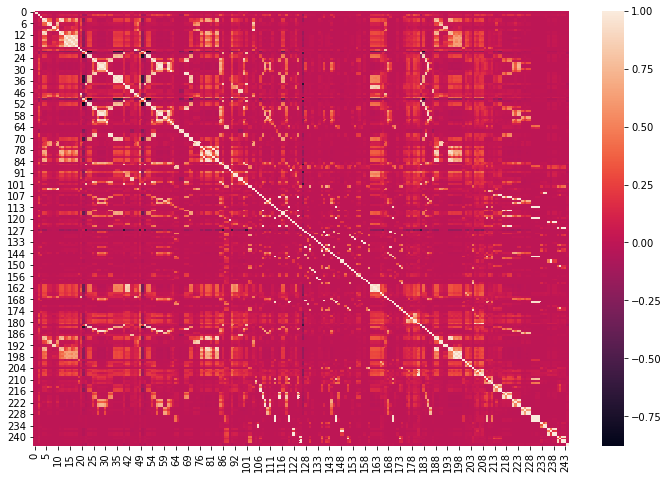

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat)

In [41]:
# data -  Training or Testing data
# threshold - Point after which the data will be discarded
def get_correlation(data, threshold):
    
    corr_col = set()
    corrmat = data.corr()
    
    # Navigating from feature to feature
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col                

In [42]:
corr_features = get_correlation(x_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [43]:
len(corr_features)

124

In [44]:
# Removing all correlated features
x_train_uncorr = x_train_unique.drop(labels=corr_features, axis=1)
x_test_uncorr = x_test_unique.drop(labels=corr_features, axis=1)

In [45]:
x_train_uncorr.shape, x_test_uncorr.shape

((16000, 103), (4000, 103))

In [46]:
%%time
run_random_forest(x_train_uncorr, x_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 4.6 s, sys: 124 ms, total: 4.72 s
Wall time: 1.67 s


Here we can see the accurracy is still close to the accuracy with original dataset but the total training time has been brought down.

## Feature Grouping

In the above case we discarded all the correlated features but now we will try with keeping one of the most important features. The feature which gives more information will be kept and the other will be discarded.

In [47]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.008825,0.000922,0.041321,0.000541,-0.001905,0.000871,-0.000818,-0.000866,-0.000309,-0.000349,...,0.012705,0.021540,-0.000170,0.032162,0.030087,1.000000,0.329805,0.935317,0.919036,0.011106
241,-0.009174,0.000598,0.016172,-0.000577,-0.000635,0.007096,-0.000515,-0.000545,-0.000195,-0.000220,...,-0.000173,-0.000185,-0.000107,-0.000174,-0.000178,0.329805,1.000000,0.127224,0.140902,0.011807
242,0.012031,0.000875,0.043577,0.000231,-0.002552,-0.001672,-0.000779,-0.000825,-0.000295,-0.000332,...,0.027515,0.012393,-0.000162,0.018565,0.017358,0.935317,0.127224,1.000000,0.993536,0.008604
243,0.012128,0.000942,0.044281,0.000235,-0.002736,-0.001844,-0.000839,-0.000888,-0.000317,-0.000358,...,0.023072,0.014523,-0.000174,0.021742,0.020331,0.919036,0.140902,0.993536,1.000000,0.009136


In [50]:
# Vertically stacking the features. Ex., 0 vs 0 to 244
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
              ...   
244  240    0.011106
     241    0.011807
     242    0.008604
     243    0.009136
     244    1.000000
Length: 51529, dtype: float64

In [51]:
# Sorting all values in descending order
corrdata = corrdata.sort_values(ascending=False)
corrdata

# Now we can see the correlated data stacked together. 
# Ex., Feature 29 is correlated with 58 and 58 is correlated with 29 and so on.

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
                ...     
229  111    1.934954e-06
231  150    6.044672e-07
150  231    6.044672e-07
231  123    3.966696e-07
123  231    3.966696e-07
Length: 51529, dtype: float64

In [52]:
corrdata = corrdata[corrdata > 0.85]
corrdata = corrdata[corrdata < 1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
              ...   
67   66     0.851384
61   28     0.851022
28   61     0.851022
72   35     0.850893
35   72     0.850893
Length: 534, dtype: float64

In [53]:
# Converting to Pandas Dataframe
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["Features1", "Features2", "Corr_Value"]
corrdata

,Features1,Features2,Corr_Value
0,143,135,1.000000
1,135,143,1.000000
2,136,128,1.000000
3,128,136,1.000000
4,31,62,1.000000
...,...,...,...
529,67,66,0.851384
530,61,28,0.851022
531,28,61,0.851022
532,72,35,0.850893


In [54]:
# Grouping the correlated features. i.e, Group all the features which are correlated to 0 and so on.
grouped_features_list = []
correlated_groups_list = []

for feature in corrdata.Features1.unique():
    if feature not in grouped_features_list:
        correlated_block = corrdata[corrdata.Features1 == feature]
        grouped_features_list = grouped_features_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [55]:
len(correlated_groups_list)

56

In [56]:
for group in correlated_groups_list:
    print(group)

   Features1  Features2  Corr_Value
0        143        135         1.0
     Features1  Features2  Corr_Value
2          136        128    1.000000
197        136        169    0.959468
   Features1  Features2  Corr_Value
4         31         62         1.0
   Features1  Features2  Corr_Value
6         20         47         1.0
     Features1  Features2  Corr_Value
8           52         23    1.000000
297         52         24    0.927683
299         52         53    0.927683
448         52         21    0.877297
505         52        183    0.860163
     Features1  Features2  Corr_Value
12          33         69    1.000000
224         33         32    0.947113
228         33         68    0.946571
322         33         26    0.917665
337         33         55    0.914178
422         33        184    0.884383
    Features1  Features2  Corr_Value
14        157        133         1.0
    Features1  Features2  Corr_Value
16        237        149    1.000000
26        237        148    

## Feature Importance - Based on Tree based classifier

In [57]:
important_features = []
for group in correlated_groups_list:
    
    # Total features
    features = list(group.Features1.unique()) + list(group.Features2.unique())
    
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(x_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ["Features", "Importance"]
    importance.sort_values(by = "Importance", ascending=False, inplace=True)
    most_important_feature = importance.iloc[0]
    important_features.append(most_important_feature)
    

In [58]:
important_features

[Features      135.00
 Importance      0.51
 Name: 1, dtype: float64,
 Features      128.000000
 Importance      0.563757
 Name: 1, dtype: float64,
 Features      62.00
 Importance     0.51
 Name: 1, dtype: float64,
 Features      47.00
 Importance     0.51
 Name: 1, dtype: float64,
 Features      183.000000
 Importance      0.285817
 Name: 5, dtype: float64,
 Features      184.00000
 Importance      0.34728
 Name: 6, dtype: float64,
 Features      157.000000
 Importance      0.523077
 Name: 0, dtype: float64,
 Features      148.000000
 Importance      0.624498
 Name: 2, dtype: float64,
 Features      132.000000
 Importance      0.565217
 Name: 1, dtype: float64,
 Features      120.000000
 Importance      0.749683
 Name: 6, dtype: float64,
 Features      122.000000
 Importance      0.343434
 Name: 1, dtype: float64,
 Features      82.000000
 Importance     0.518827
 Name: 0, dtype: float64,
 Features      125.000000
 Importance      0.940524
 Name: 3, dtype: float64,
 Features      197

In [59]:
important_features = pd.DataFrame(important_features)

In [60]:
important_features.reset_index(inplace=True, drop=True)

In [61]:
important_features

,Features,Importance
0,135.0,0.510000
1,128.0,0.563757
2,62.0,0.510000
3,47.0,0.510000
4,183.0,0.285817
5,184.0,0.347280
6,157.0,0.523077
7,148.0,0.624498
8,132.0,0.565217
9,120.0,0.749683


In [62]:
features_to_consider = set(important_features["Features"])

In [63]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [64]:
features_to_discard = list(features_to_discard)

In [65]:
x_train_grouped_uncorr = x_train_unique.drop(labels=features_to_discard, axis=1)
x_train_grouped_uncorr.shape

(16000, 140)

In [67]:
x_test_grouped_uncorr = x_test_unique.drop(labels=features_to_discard, axis=1)
x_test_grouped_uncorr.shape

(4000, 140)

In [69]:
%%time

# Original Data
run_random_forest(x_train, x_test, y_train, y_test)

Accuracy on test set: 
0.9585
CPU times: user 7.78 s, sys: 201 ms, total: 7.98 s
Wall time: 2.62 s


In [70]:
%%time

# After discarding all correlated data
run_random_forest(x_train_uncorr, x_test_uncorr, y_train, y_test)

Accuracy on test set: 
0.95875
CPU times: user 4.75 s, sys: 110 ms, total: 4.86 s
Wall time: 1.64 s


In [68]:
%%time

# After keeping most important correlated data
run_random_forest(x_train_grouped_uncorr, x_test_grouped_uncorr, y_train, y_test)

Accuracy on test set: 
0.95775
CPU times: user 5.08 s, sys: 133 ms, total: 5.22 s
Wall time: 1.98 s


If you are handling a very large dataset then the feature selection is very important.